# Data cleanup

Basic data inspection, standardization and cleanup.

In [1]:
import pandas as pd

# https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data/data
df_btc = pd.read_csv('data/btc_usd.csv')
df_btc.info()

# https://www.kaggle.com/datasets/imranbukhari/comprehensive-ethusd-1m-data
df_eth = pd.read_csv('data/eth_usd_combined.csv')
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747281 entries, 0 to 6747280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 308.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222723 entries, 0 to 4222722
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  object 
 1   Volume     float64
 2   Open       float64
 3   High       float64
 4   Low        float64
 5   Close      float64
dtypes: float64(5), object(1)
memory usage: 193.3+ MB


In [2]:
df_btc.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [3]:
df_eth.head()

,Timestamp,Volume,Open,High,Low,Close
0,2016-09-29 00:00:00,5.154930,13.31,13.31,13.30,13.30
1,2016-09-29 00:01:00,5.077465,13.30,13.30,13.30,13.30
2,2016-09-29 00:02:00,5.000000,13.30,13.30,13.30,13.30
3,2016-09-29 00:03:00,1.537550,13.30,13.33,13.30,13.33
4,2016-09-29 00:04:00,3.120290,13.33,13.33,13.32,13.32


In [4]:
missing_values_btc = df_btc.isnull().sum()
print(missing_values_btc)

missing_values_eth = df_eth.isnull().sum()
print(missing_values_eth)

Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64
Timestamp    0
Volume       0
Open         0
High         0
Low          0
Close        0
dtype: int64


In [5]:
df_btc.ffill()
df_eth.ffill()

df_btc['Timestamp'] = pd.to_datetime(df_btc['Timestamp'], unit='s')
df_eth['Timestamp'] = pd.to_datetime(df_eth['Timestamp'])

df_btc = df_btc[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']]
df_eth = df_eth[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']]

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df_btc[numeric_columns] = df_btc[numeric_columns].astype(float)
df_eth[numeric_columns] = df_eth[numeric_columns].astype(float)

df_btc.set_index('Timestamp')
df_eth.set_index('Timestamp')

,Open,High,Low,Close,Volume
Timestamp,,,,,
2016-09-29 00:00:00,13.31,13.31,13.30,13.30,5.154930
2016-09-29 00:01:00,13.30,13.30,13.30,13.30,5.077465
2016-09-29 00:02:00,13.30,13.30,13.30,13.30,5.000000
2016-09-29 00:03:00,13.30,13.33,13.30,13.33,1.537550
2016-09-29 00:04:00,13.33,13.33,13.32,13.32,3.120290
...,...,...,...,...,...
2024-10-30 16:28:00,2683.72,2684.05,2681.83,2683.91,420.242882
2024-10-30 16:29:00,2683.91,2684.00,2683.08,2683.79,272.776360
2024-10-30 16:30:00,2683.79,2686.28,2683.59,2685.68,558.662425


In [6]:
df_btc.drop_duplicates(inplace=True)
df_eth.drop_duplicates(inplace=True)

In [7]:
stats_btc = df_btc.describe()
print(stats_btc)

stats_eth = df_eth.describe()
print(stats_eth)

                           Timestamp          Open          High  \
count                        6747280  6.747281e+06  6.747281e+06   
mean   2018-06-01 20:59:26.499911168  1.468382e+04  1.469013e+04   
min              2012-01-01 10:01:00  3.800000e+00  3.800000e+00   
25%              2015-03-17 22:40:45  4.137300e+02  4.138900e+02   
50%              2018-06-01 11:20:30  6.270040e+03  6.272710e+03   
75%              2021-08-16 00:00:15  2.323400e+04  2.324100e+04   
max              2025-01-21 00:00:00  1.089460e+05  1.090300e+05   
std                              NaN  1.994912e+04  1.995674e+04   

                Low         Close        Volume  
count  6.747281e+06  6.747281e+06  6.747281e+06  
mean   1.467732e+04  1.468384e+04  5.458365e+00  
min    3.800000e+00  3.800000e+00  0.000000e+00  
25%    4.135200e+02  4.137200e+02  1.830000e-02  
50%    6.268070e+03  6.270060e+03  5.000000e-01  
75%    2.322600e+04  2.323400e+04  3.174796e+00  
max    1.087760e+05  1.089600e+05  5.

### Visualization

/home/enix/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


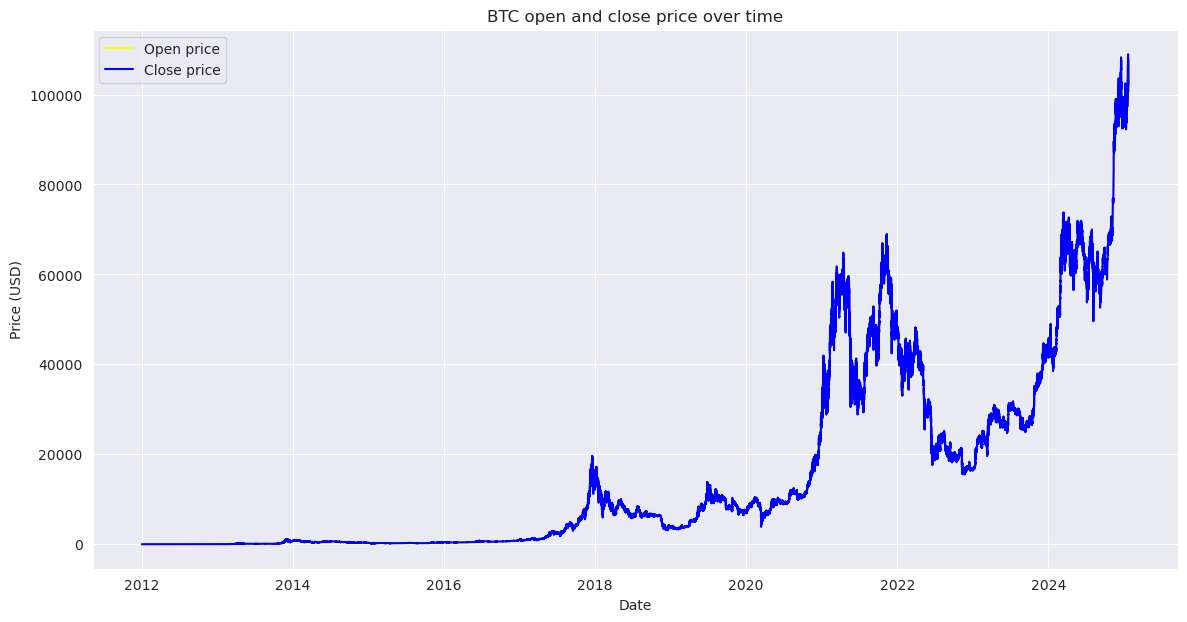

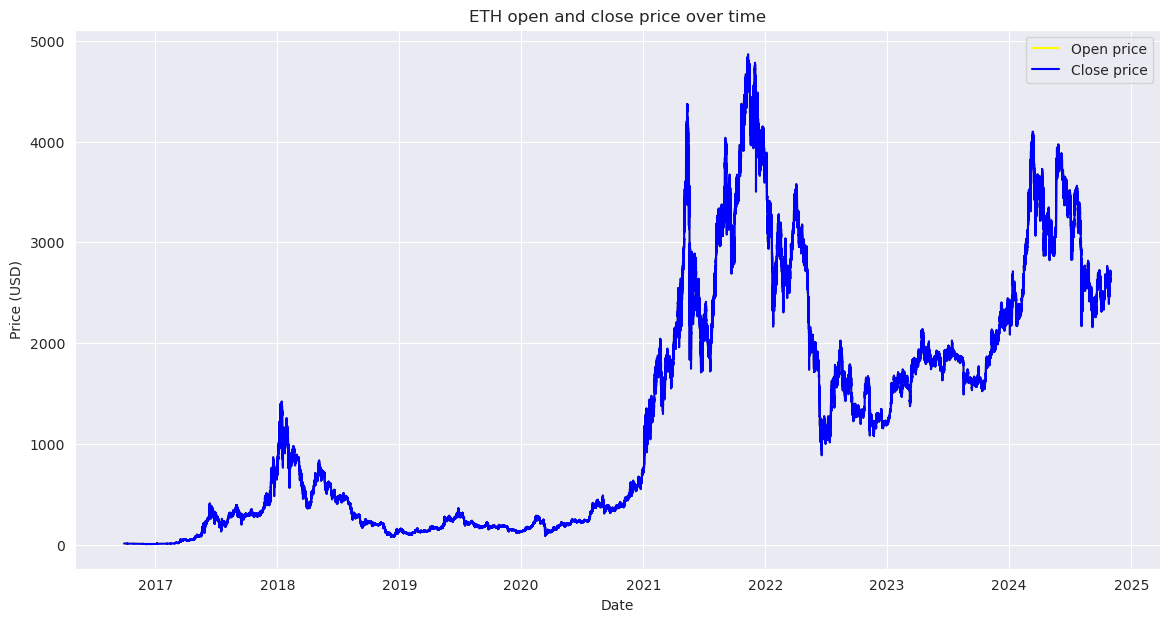

In [8]:
import matplotlib.pyplot as plt

# BTC
plt.figure(figsize=(14, 7))
plt.plot(df_btc['Timestamp'], df_btc['Open'], label='Open price', color='yellow')
plt.plot(df_btc['Timestamp'], df_btc['Close'], label='Close price', color='blue')
plt.title('BTC open and close price over time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# ETH
plt.figure(figsize=(14, 7))
plt.plot(df_eth['Timestamp'], df_eth['Open'], label='Open price', color='yellow')
plt.plot(df_eth['Timestamp'], df_eth['Close'], label='Close price', color='blue')
plt.title('ETH open and close price over time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

#### BTC/ETH feature correlation heatmap

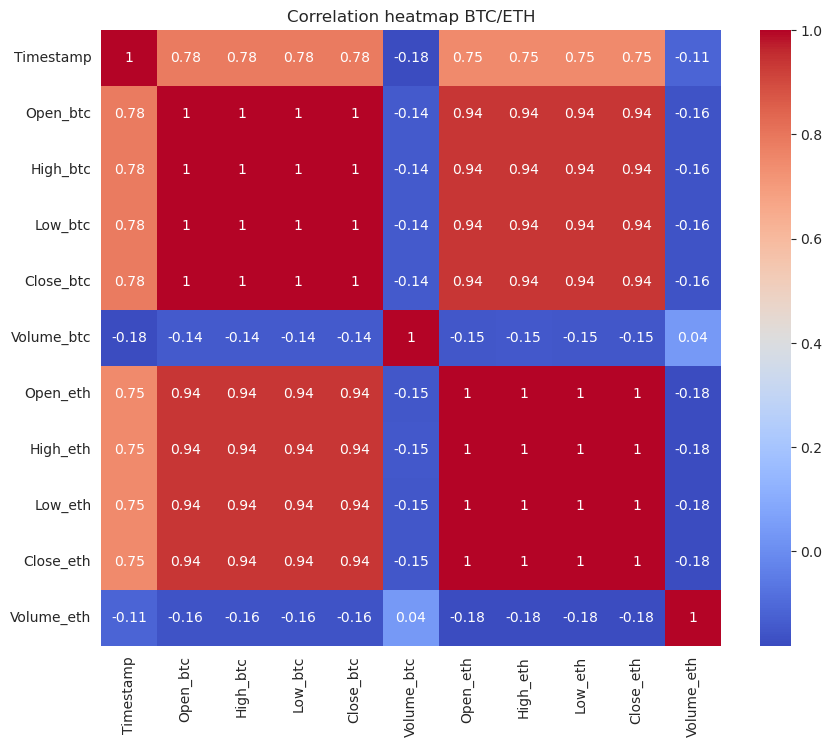

In [9]:
# Combine BTC and ETH data
df_combined = pd.merge(df_btc, df_eth, on='Timestamp', suffixes=('_btc', '_eth'))

# Calculate correlation matrix
partial_correlation = df_combined.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(partial_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap BTC/ETH')
plt.show()

#### Rolling correlation between closing prices

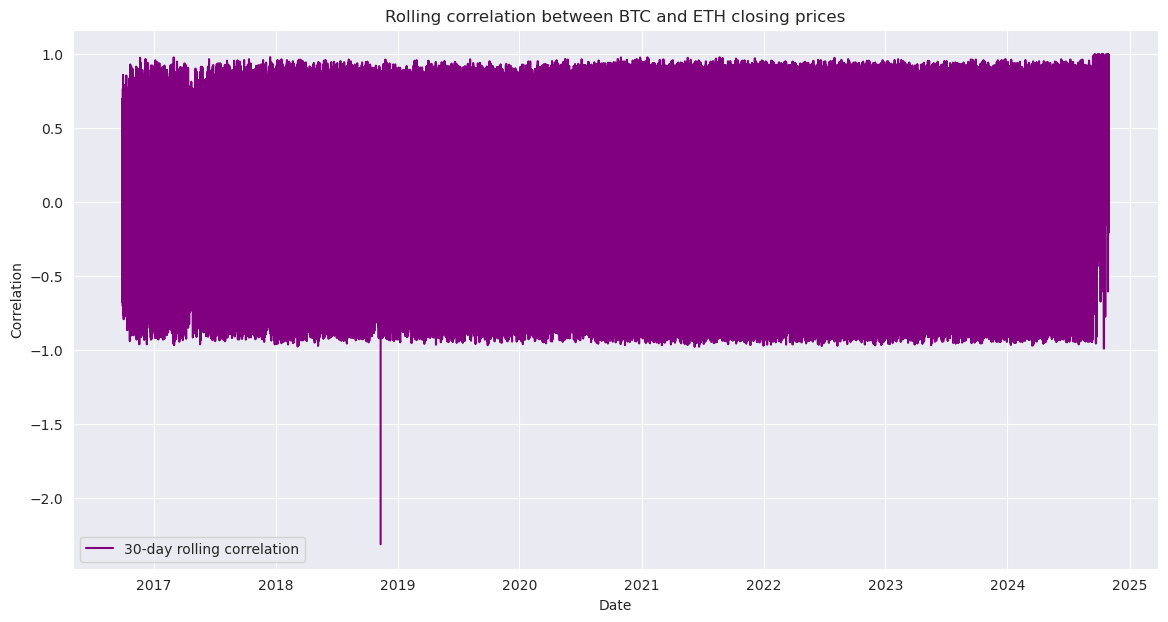

In [10]:
rolling_correlation = df_combined['Close_btc'].rolling(window=30).corr(df_combined['Close_eth'])

plt.figure(figsize=(14, 7))
plt.plot(df_combined['Timestamp'], rolling_correlation, label='30-day rolling correlation', color='purple')
plt.title('Rolling correlation between BTC and ETH closing prices')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

#### Rolling volatility

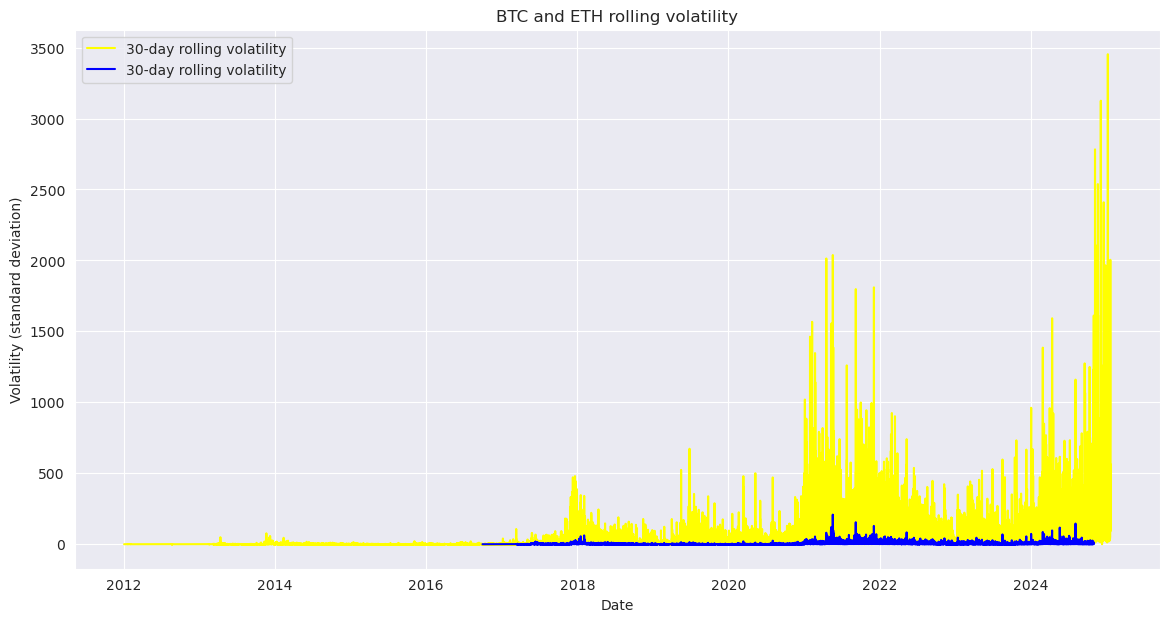

In [11]:
df_btc['Volatility'] = df_btc['Close'].rolling(window=30).std()
df_eth['Volatility'] = df_eth['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(df_btc['Timestamp'], df_btc['Volatility'], label='30-day rolling volatility', color='yellow')
plt.plot(df_eth['Timestamp'], df_eth['Volatility'], label='30-day rolling volatility', color='blue')
plt.title('BTC and ETH rolling volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (standard deviation)')
plt.legend()
plt.show()

#### Price vs volume

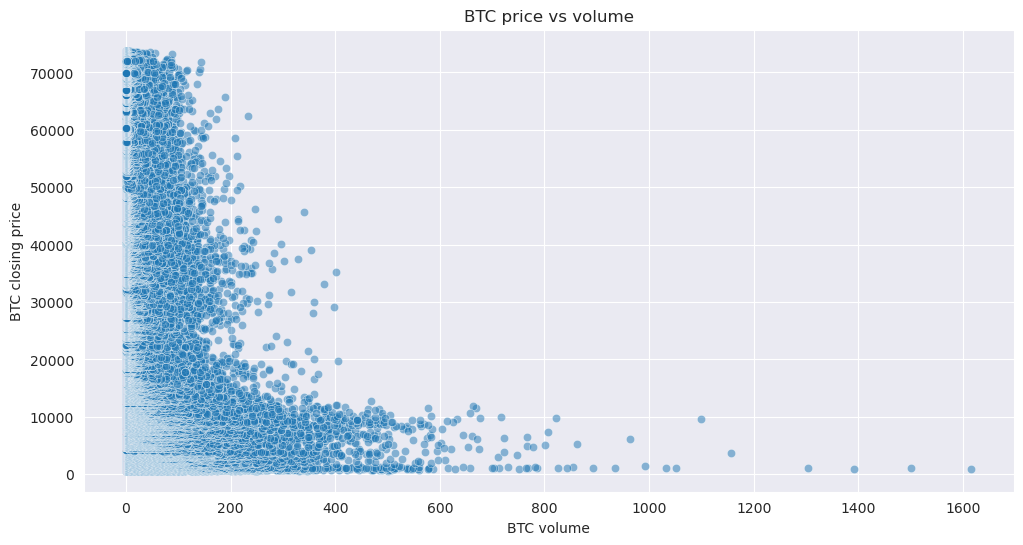

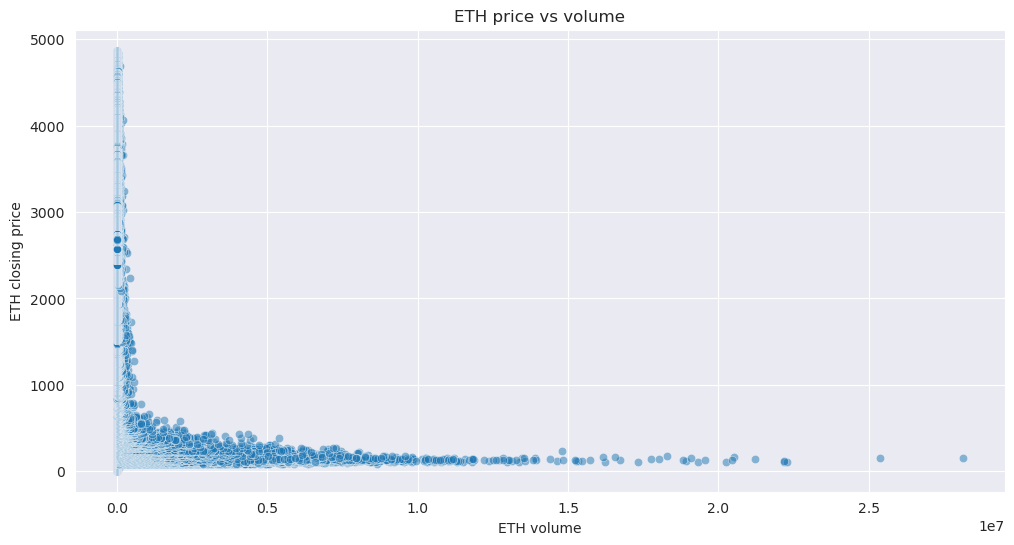

In [12]:
# BTC
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_combined, x='Volume_btc', y='Close_btc', alpha=0.5)
plt.title('BTC price vs volume')
plt.xlabel('BTC volume')
plt.ylabel('BTC closing price')
plt.show()

# ETH
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_combined, x='Volume_eth', y='Close_eth', alpha=0.5)
plt.title('ETH price vs volume')
plt.xlabel('ETH volume')
plt.ylabel('ETH closing price')
plt.show()

# Machine learning

Calculate mean average for later on (if needed). Ensure no empty values just in case.

In [13]:
# BTC
df_btc['Price_Change'] = df_btc['Close'].pct_change() * 100
df_btc['MA_10'] = df_btc['Close'].rolling(window=10).mean()
df_btc.dropna(inplace=True)

# ETH
df_eth['Price_Change'] = df_eth['Close'].pct_change() * 100
df_eth['MA_10'] = df_eth['Close'].rolling(window=10).mean()
df_eth.dropna(inplace=True)

Split data into training and test sets.

In [14]:
from sklearn.model_selection import train_test_split

# BTC
X_btc = df_btc[['Open', 'High', 'Low', 'Volume', 'MA_10']]
y_btc = df_btc['Close']

X_btc_train, X_btc_test, y_btc_train, y_btc_test = train_test_split(X_btc, y_btc, test_size=0.2, random_state=42)

# ETH
X_eth = df_eth[['Open', 'High', 'Low', 'Volume', 'MA_10']]
y_eth = df_eth['Close']

X_eth_train, X_eth_test, y_eth_train, y_eth_test = train_test_split(X_eth, y_eth, test_size=0.2, random_state=42)

### Linear regression

In [15]:
from sklearn.linear_model import LinearRegression

X_combined_btc = df_combined[['Volume_btc']]
y_combined_btc = df_combined['Close_btc']

model_btc = LinearRegression()
model_btc.fit(X_combined_btc, y_combined_btc)

print(f'BTC Regression coefficient: {model_btc.coef_[0]}')

X_combined_eth = df_combined[['Volume_eth']]
y_combined_eth = df_combined['Close_eth']

model_eth = LinearRegression()
model_eth.fit(X_combined_eth, y_combined_eth)

print(f'ETH Regression coefficient: {model_eth.coef_[0]}')

BTC Regression coefficient: -204.0217116956114
ETH Regression coefficient: -0.0010473652320478685


### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

# BTC
model_forest_btc = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
model_forest_btc.fit(X_btc_train, y_btc_train)

# ETH
model_forest_eth = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
model_forest_eth.fit(X_eth_train, y_eth_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

#### Learning accuracy metrics

In [17]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# BTC
y_btc_pred = model_forest_btc.predict(X_btc_test)

mae_btc = mean_absolute_error(y_btc_test, y_btc_pred)
rmse_btc = root_mean_squared_error(y_btc_test, y_btc_pred)

print(f'[BTC] MAE: {mae_btc}, RMSE: {rmse_btc}')

# ETH
y_eth_pred = model_forest_eth.predict(X_eth_test)

mae_eth = mean_absolute_error(y_eth_test, y_eth_pred)
rmse_eth = root_mean_squared_error(y_eth_test, y_eth_pred)

print(f'[ETH] MAE: {mae_eth}, RMSE: {rmse_eth}')

[BTC] MAE: 3.8092542999728325, RMSE: 10.889214884874566
[ETH] MAE: 0.42052539727595556, RMSE: 0.9064624710397999


#### Actual vs predicted price

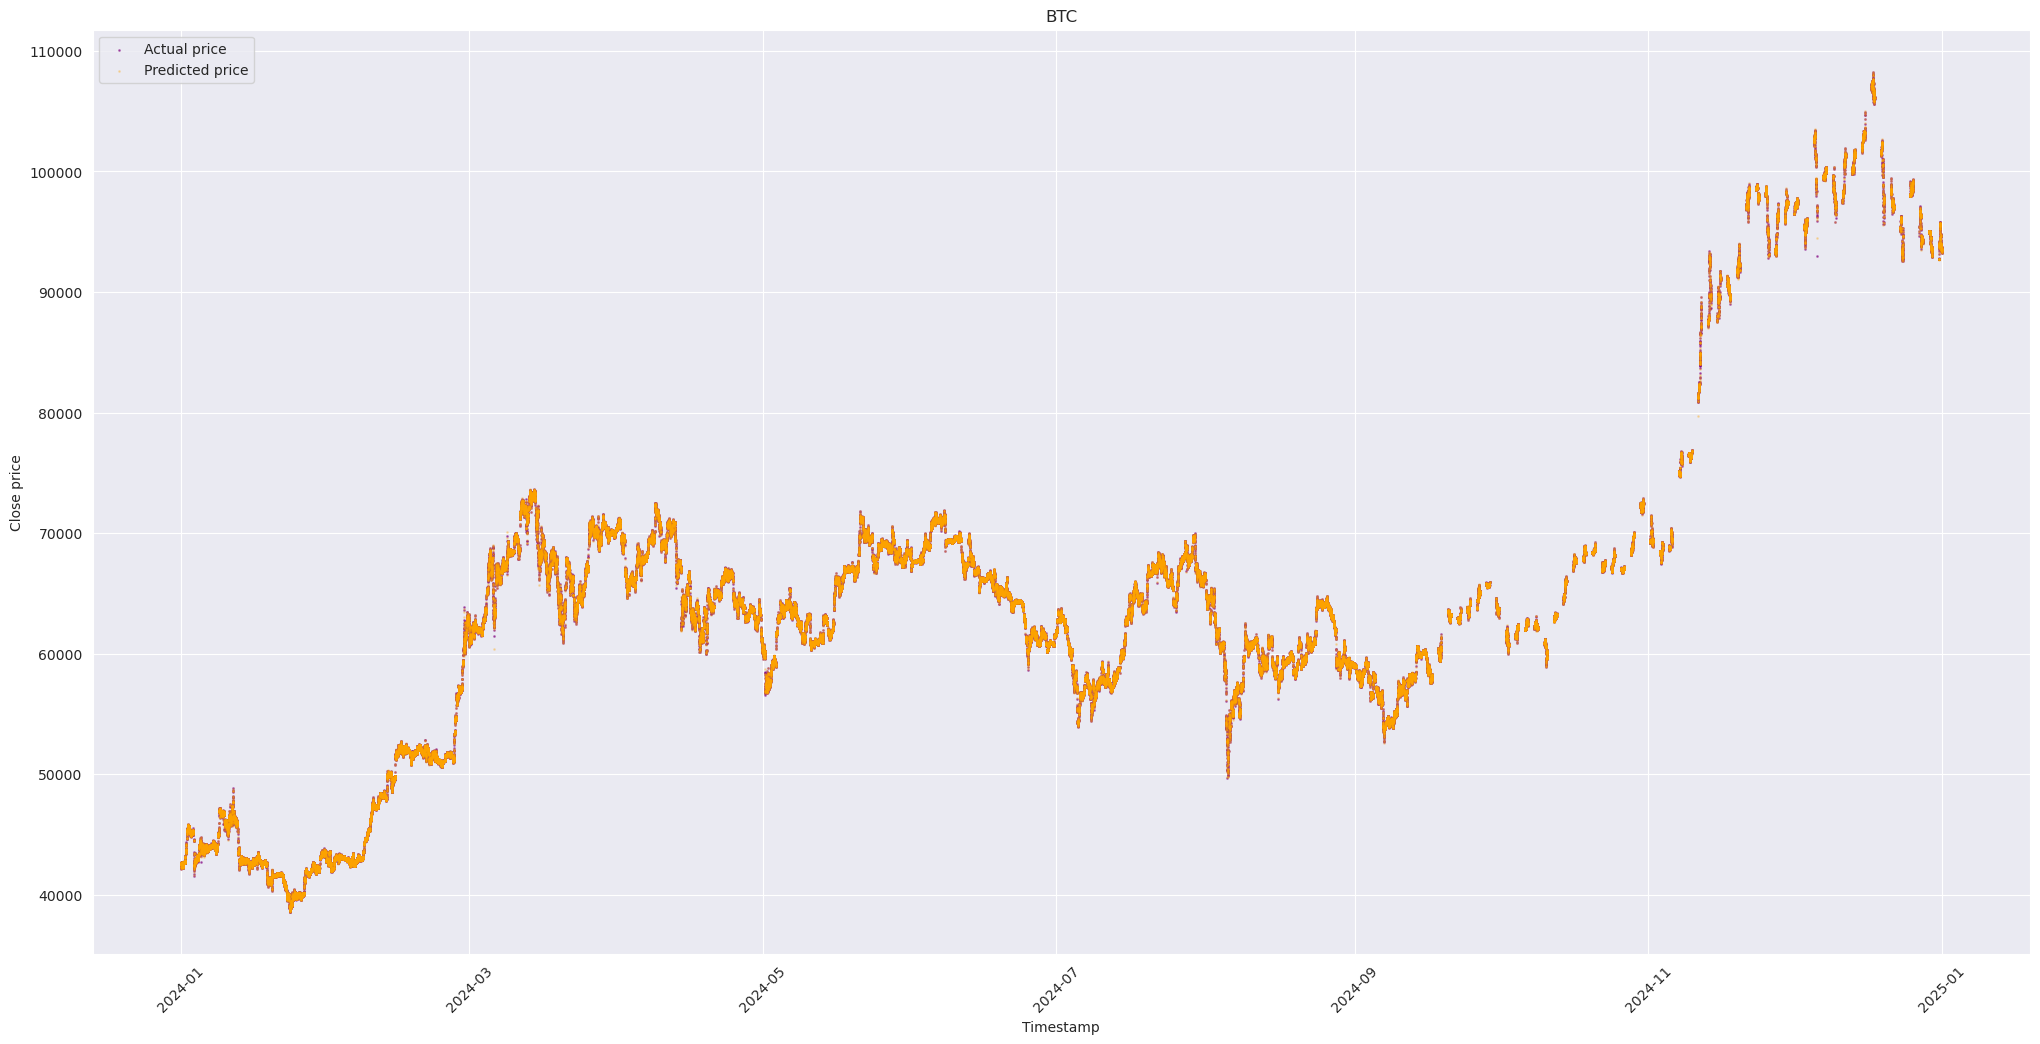

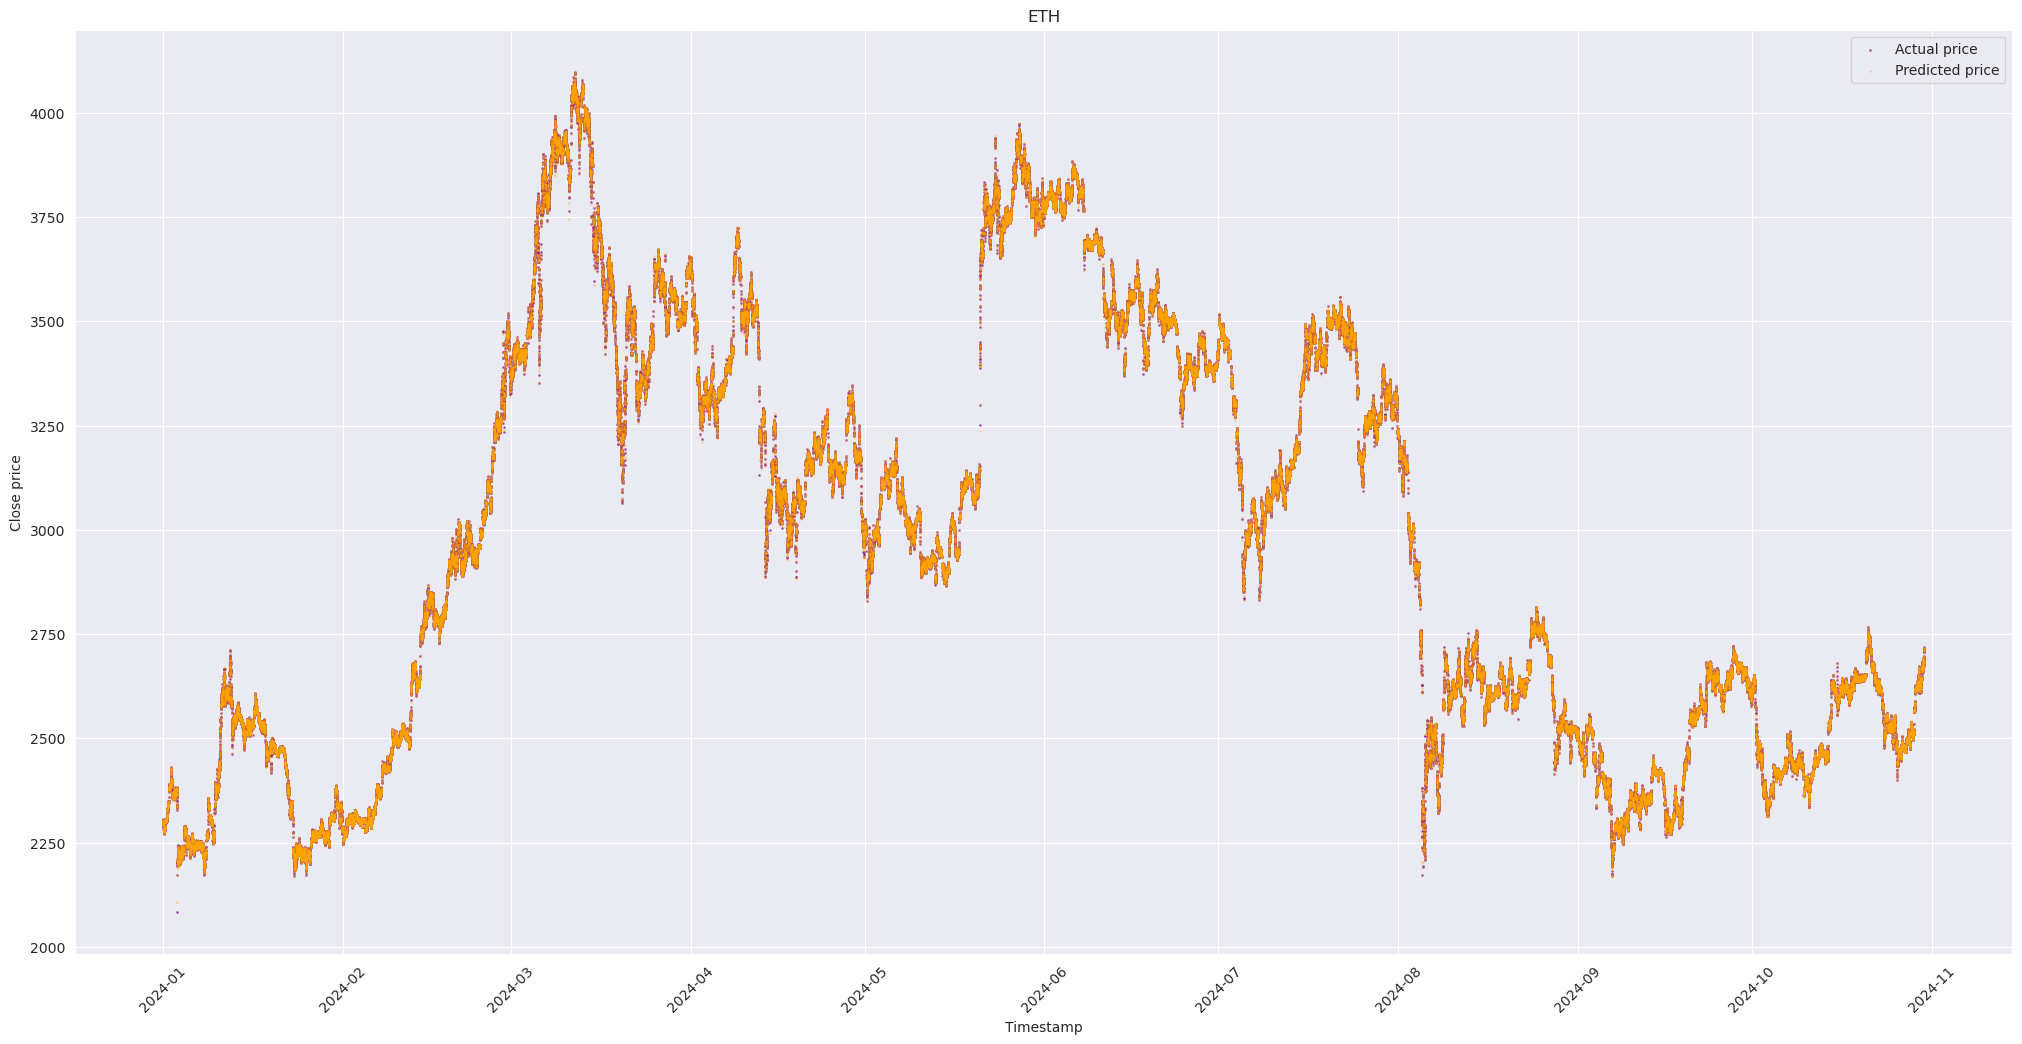

In [18]:
# BTC
btc_results = pd.DataFrame({
    'Timestamp': df_btc.loc[X_btc_test.index, 'Timestamp'],
    'Actual': y_btc_test,
    'Predicted': y_btc_pred
})
btc_results = btc_results[btc_results['Timestamp'].dt.year == 2024]

plt.figure(figsize=(25, 12))
plt.scatter(btc_results['Timestamp'], btc_results['Actual'], label='Actual price', color='purple', alpha=0.5, s=1)
plt.scatter(btc_results['Timestamp'], btc_results['Predicted'], label='Predicted price', color='orange', alpha=0.25,
            s=1)
plt.title('BTC')
plt.xlabel('Timestamp')
plt.ylabel('Close price')
plt.xticks(rotation=45)
plt.legend()

plt.show()

# ETH
eth_results = pd.DataFrame({
    'Timestamp': df_eth.loc[X_eth_test.index, 'Timestamp'],
    'Actual': y_eth_test,
    'Predicted': y_eth_pred
})
eth_results = eth_results[eth_results['Timestamp'].dt.year == 2024]

plt.figure(figsize=(25, 12))
plt.scatter(eth_results['Timestamp'], eth_results['Actual'], label='Actual price', color='purple', alpha=0.5, s=1)
plt.scatter(eth_results['Timestamp'], eth_results['Predicted'], label='Predicted price', color='orange', alpha=0.25,
            s=1)
plt.title('ETH')
plt.xlabel('Timestamp')
plt.ylabel('Close price')
plt.xticks(rotation=45)
plt.legend()

plt.show()

#### Feature importance

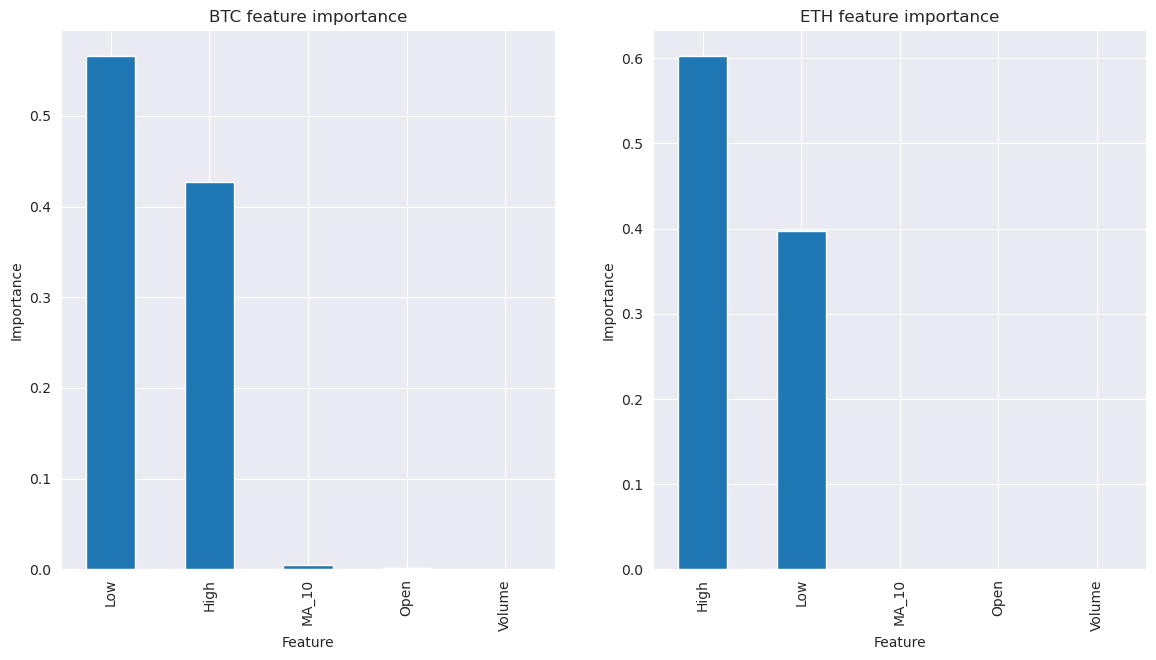

In [19]:
importance_btc = model_forest_btc.feature_importances_
importance_eth = model_forest_eth.feature_importances_

feature_names_btc = X_btc.columns
feature_names_eth = X_eth.columns

importance_df_btc = pd.DataFrame({'Feature': feature_names_btc, 'Importance': importance_btc})
importance_df_eth = pd.DataFrame({'Feature': feature_names_eth, 'Importance': importance_eth})

importance_df_btc = importance_df_btc.sort_values(by='Importance', ascending=False)
importance_df_eth = importance_df_eth.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

importance_df_btc.plot(kind='bar', x='Feature', y='Importance', ax=ax[0], legend=False)
ax[0].set_title('BTC feature importance')
ax[0].set_ylabel('Importance')

importance_df_eth.plot(kind='bar', x='Feature', y='Importance', ax=ax[1], legend=False)
ax[1].set_title('ETH feature importance')
ax[1].set_ylabel('Importance')

plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential, Input
from keras.api.layers import LSTM, Dropout, Dense
import numpy as np

features = df_btc[['Open', 'High', 'Low', 'Volume']]
target = df_btc['Close']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

time_step = 10
X, y = [], []

for i in range(time_step, len(scaled_features)):
    X.append(scaled_features[i - time_step:i])
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-01-22 22:25:00.567700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-22 22:25:00.586707: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-22 22:25:00.591281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 22:25:00.662927: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(25, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=2)

Epoch 1/10
10543/10543 - 70s - 7ms/step - loss: 287622272.0000
Epoch 2/10
10543/10543 - 68s - 6ms/step - loss: 10159519.0000
Epoch 3/10
10543/10543 - 68s - 6ms/step - loss: 4996825.5000
Epoch 4/10
10543/10543 - 68s - 6ms/step - loss: 4539771.0000
Epoch 5/10
10543/10543 - 67s - 6ms/step - loss: 4075487.7500
Epoch 6/10
10543/10543 - 68s - 6ms/step - loss: 3648574.2500
Epoch 7/10
10543/10543 - 69s - 7ms/step - loss: 3259261.0000
Epoch 8/10
10543/10543 - 68s - 6ms/step - loss: 2904144.5000
Epoch 9/10
10543/10543 - 68s - 6ms/step - loss: 2591323.7500
Epoch 10/10
10543/10543 - 68s - 6ms/step - loss: 2236635.0000


In [38]:
predictions = model.predict(X_test, verbose=2)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(results_df.head())

42171/42171 - 61s - 1ms/step
    Actual    Predicted
0  9331.11  9126.976562
1     6.31   151.002426
2   728.91   768.080933
3  9177.93  9001.083984
4  9971.72  9740.171875


In [40]:
# df_btc.set_index('Timestamp', inplace=True)
last_year = df_btc.last('30ME')

predict_next = []

for i in range(time_step):
    current_prediction = np.array([[df_btc.Open.tail(time_step - i).quantile(0.25), df_btc.Low.tail(time_step - i).quantile(0.25),
                          df_btc.High.tail(time_step - i).quantile(0.75), df_btc.Volume.tail(time_step - i).quantile()]])

    scaled_current_prediction = scaler.fit_transform(current_prediction)
    scaled_current_prediction = scaled_current_prediction.reshape(1, 1, 4)

    prediction = model.predict(scaled_current_prediction, verbose=2)
    predict_next.append(prediction)

predict_next = np.array(predict_next)
print(predict_next.flatten())

1/1 - 0s - 146ms/step


/tmp/ipykernel_1599181/36391392.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_year = df_btc.last('30ME')


1/1 - 0s - 12ms/step
1/1 - 0s - 15ms/step
1/1 - 0s - 13ms/step
1/1 - 0s - 12ms/step
1/1 - 0s - 11ms/step
1/1 - 0s - 11ms/step
1/1 - 0s - 11ms/step
1/1 - 0s - 11ms/step
1/1 - 0s - 11ms/step
[21004.918 21004.918 21004.918 21004.918 21004.918 21004.918 21004.918
 21004.918 21004.918 21004.918]


In [41]:
last_date = df_btc.index[-1]
predicted_dates = pd.date_range(start=last_date + pd.Timedelta(minutes=1), periods=10, freq=pd.Timedelta(minutes=1))
predicted_df = pd.DataFrame(predict_next.flatten(), index=predicted_dates, columns=['Predicted'])

print(predicted_df.head())


                        Predicted
2025-01-21 00:01:00  21004.917969
2025-01-21 00:02:00  21004.917969
2025-01-21 00:03:00  21004.917969
2025-01-21 00:04:00  21004.917969
2025-01-21 00:05:00  21004.917969


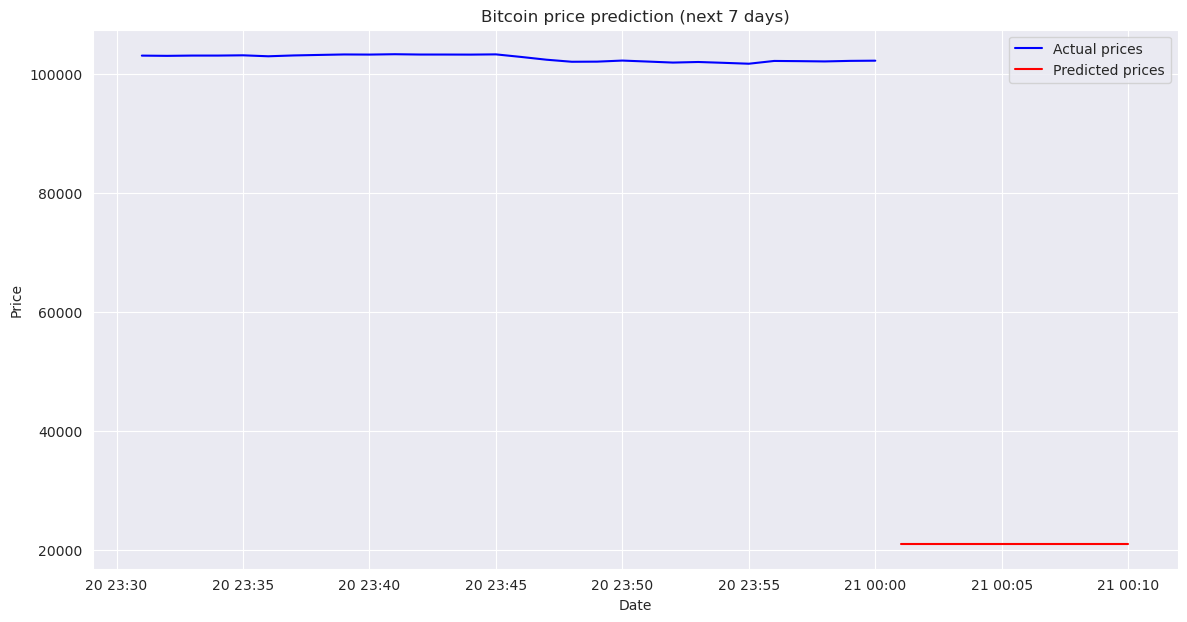

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(df_btc.Close.tail(30), label='Actual prices', color='blue')
plt.plot(predicted_df, label='Predicted prices', color='red')
plt.title('Bitcoin price prediction (next 7 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()